# Analisis de red de polinizadores

En este notebook, se desarrolla el análisis de las redes de polinizadores, tanto de manera gráfica como numérica. 

Paquetes necesarios.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import pandas as pd

import numpy as np
from scipy.spatial.distance import cosine

## Carga de datos

Leemos la matriz de interacciones de polinizadores y plantas.

In [22]:
# Leo el archivo TablaIncidencia.csv
df = pd.read_csv('TablaIncidencia.csv', sep=',', header=0)
# Genero la matriz de incidencia en test
M_test = pd.crosstab(df['Familia'], df['categoría'], margins=True)
# Eliminio la fila y columna All
M_test = M_test.drop('All', axis=0)
M_test = M_test.drop('All', axis=1)
# Genero la matriz de incidencia en detección
M_det = pd.crosstab(df['Familia'], df['deteccion'], margins=True)
M_det = M_det.drop('no_detection', axis=1)
# Eliminio la fila y columna All
M_det = M_det.drop('All', axis=0)
M_det = M_det.drop('All', axis=1)
# Nombres de indices
index_names_test = M_test.index
index_names_det = M_det.index
# Nombres de columnas
column_names_test = M_test.columns
column_names_det = M_det.columns

Leemos la matriz de probabilidad de adyacencia de las redes de polinizadores y plantas.

In [23]:
# Leo los archivos sin encabezado
edge_prob_det = np.loadtxt('edge_prob_det.csv', delimiter=',', skiprows=1)
edge_prob_test = np.loadtxt('edge_prob_test.csv', delimiter=',', skiprows=1)

n_p = edge_prob_det.shape[0]
n_a = edge_prob_det.shape[1]

Grafico de las matrices de probabilidad de adyacencia con la detección realizada por humanos.

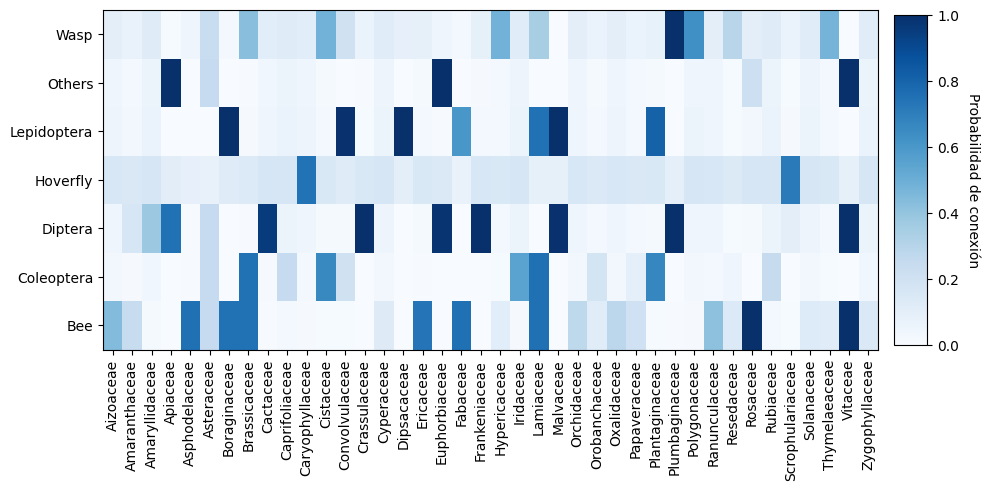

In [24]:
# transpongo 
temp = edge_prob_test.T
plt.figure(figsize=(10,5))
plt.pcolormesh(temp, cmap=plt.cm.Blues, vmin=0, vmax=1)
cb= plt.colorbar(fraction=0.04, pad=0.02, aspect=10)
cb.ax.get_yaxis().labelpad = 15
cb.set_label('Probabilidad de conexión', rotation=270)
# coloco en el eje y los nombres index_names_test
plt.xticks(np.arange(M_test.shape[0])+0.5, index_names_test, rotation=90)
# coloco en el eje x los nombres column_names_test
plt.yticks(np.arange(M_test.shape[1])+0.5, column_names_test, rotation=0)
plt.tight_layout()
plt.show()

Gráfico de la red de polinizadores y plantas, mediante la detección realizada por humanos. Con un nivel de corte de 0.7.

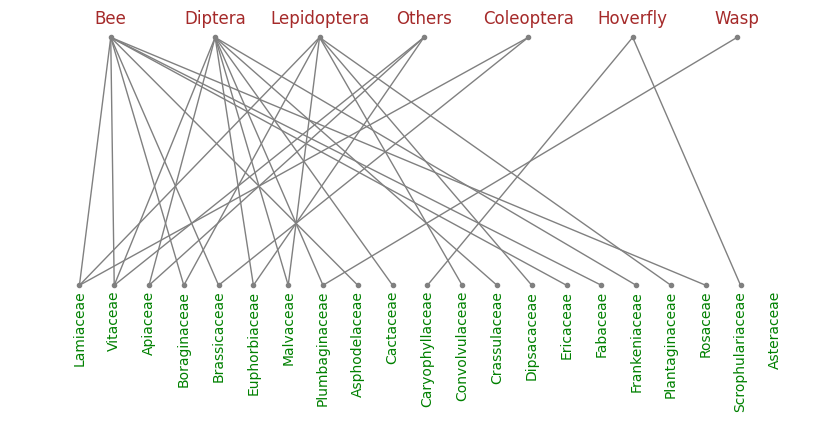

In [25]:
edge_prob_test_binary = np.where(edge_prob_test > 0.7, 1, 0)
# Crear un grafo bipartito
B_test = nx.Graph()

B_test.add_nodes_from(index_names_test, bipartite=0)
B_test.add_nodes_from(column_names_test, bipartite=1)

# Añadir bordes según la matriz
for i, row in enumerate(edge_prob_test_binary):
    for j, val in enumerate(row):
        if val == 1:
            B_test.add_edge(index_names_test[i], column_names_test[j])

# Remuevo los nodos que no tienen conexión
B_test.remove_nodes_from(list(nx.isolates(B_test)))

# nodos insectos
insectos = ['Bee','Diptera','Lepidoptera','Others','Coleoptera','Hoverfly','Wasp']
# nodos plantas ordenados por grado
plantas = ['Lamiaceae', 'Vitaceae', 'Apiaceae', 'Boraginaceae', 'Brassicaceae', 'Euphorbiaceae', 'Malvaceae', 'Plumbaginaceae', 'Asphodelaceae', 'Cactaceae', 'Caryophyllaceae', 'Convolvulaceae', 'Crassulaceae', 'Dipsacaceae', 'Ericaceae', 'Fabaceae', 'Frankeniaceae', 'Plantaginaceae', 'Rosaceae', 'Scrophulariaceae','Asteraceae']

# tamaño de la figura
plt.figure(figsize=(8,3))
# Improved layout aumentando el espacio vertical entre los nodos
pos = nx.bipartite_layout(B_test, insectos, align='horizontal')

# Ordeno la posición de los nodos por grado
for n, node in enumerate(insectos):
    pos[node] = (n*21/7+0.9, 0.5)

for n, node in enumerate(plantas):
    pos[node] = (n, 0)
    

# Dibujar el grafo bipartito
nx.draw(B_test, pos, with_labels=False, node_size=9, edge_color='gray', node_color='gray')

# Align labels to the left and right
for node, (x, y) in pos.items():
    horizontal_alignment = 'center'
    vertical_alignment = 'top' if node in index_names_test else 'bottom'
    colores = 'green' if node in index_names_test else 'brown'
    tamano = 10 if node in index_names_test else 12
    y = y - 0.01 if node in index_names_test else y + 0.02
    x = x
    # rotación
    rotation = 90 if node in index_names_test else 0
    plt.text(x, y, node, size=tamano, horizontalalignment=horizontal_alignment, verticalalignment=vertical_alignment, color=colores, rotation=rotation)

# Show plot with improvements
plt.show()

Grafico de las matrices de probabilidad de adyacencia con la detección realizada por YOLOv5.

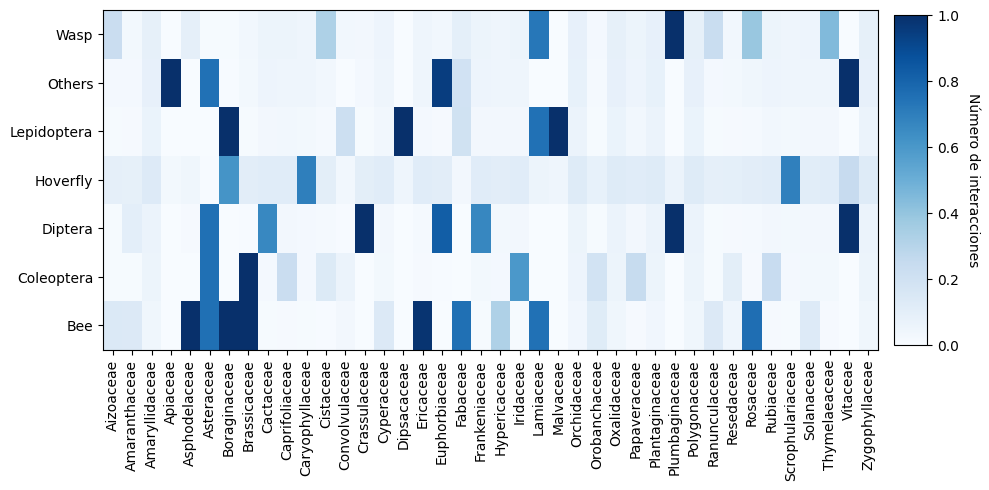

In [26]:
# transpongo 
temp = edge_prob_det.T
plt.figure(figsize=(10,5))
plt.pcolormesh(temp, cmap=plt.cm.Blues, vmin=0, vmax=1)
cb= plt.colorbar(fraction=0.04, pad=0.02, aspect=10)
cb.ax.get_yaxis().labelpad = 15
cb.set_label('Número de interacciones', rotation=270)
# coloco en el eje y los nombres index_names_test
plt.xticks(np.arange(M_det.shape[0])+0.5, index_names_det, rotation=90)
# coloco en el eje x los nombres column_names_test
plt.yticks(np.arange(M_det.shape[1])+0.5, column_names_det, rotation=0)
plt.tight_layout()
plt.show()

Gráfico de la red de polinizadores y plantas, mediante la detección realizada por YOLOv5. Con un nivel de corte de 0.7.

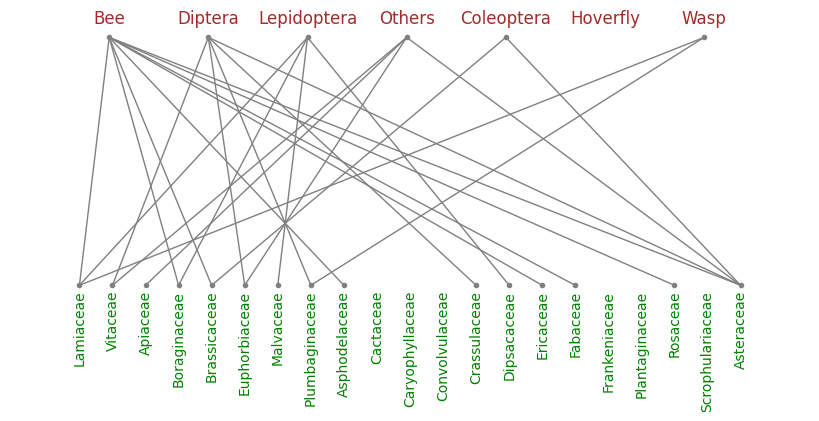

In [27]:
edge_prob_det_binary = np.where(edge_prob_det > 0.7, 1, 0)
# Crear un grafo bipartito
B_det = nx.Graph()

B_det.add_nodes_from(index_names_det, bipartite=0)
B_det.add_nodes_from(column_names_det, bipartite=1)

# Añadir bordes según la matriz
for i, row in enumerate(edge_prob_det_binary):
    for j, val in enumerate(row):
        if val == 1:
            B_det.add_edge(index_names_det[i], column_names_det[j])

# Remuevo los nodos que no tienen conexión
B_det.remove_nodes_from(list(nx.isolates(B_det)))

# tamaño de la figura
plt.figure(figsize=(8,3))
# Improved layout aumentando el espacio vertical entre los nodos
# pos = nx.bipartite_layout(B_det, index_names_det, align='horizontal')

# Dibujar el grafo bipartito
nx.draw(B_det, pos, with_labels=False, node_size=9, edge_color='gray', node_color='gray')

# Align labels to the left and right
for node, (x, y) in pos.items():
    horizontal_alignment = 'center'
    vertical_alignment = 'top' if node in index_names_det else 'bottom'
    colores = 'green' if node in index_names_det else 'brown'
    tamano = 10 if node in index_names_test else 12
    y = y - 0.01 if node in index_names_det else y + 0.02
    x = x
    # rotación
    rotation = 90 if node in index_names_det else 0
    plt.text(x, y, node, size=tamano, horizontalalignment=horizontal_alignment, verticalalignment=vertical_alignment, color=colores, rotation=rotation)

# Show plot with improvements
plt.show()

## Comparación de redes

Seleccionamos la componente conexa más grande de la red de polinizadores y plantas.

In [28]:
# Componente conexa máxima de cada grafo
B_test_max = max(nx.connected_components(B_test), key=len)
B_test_max = B_test.subgraph(B_test_max).copy()
B_det_max = max(nx.connected_components(B_det), key=len)
B_det_max = B_det.subgraph(B_det_max).copy()

Grafico de ambas redes.

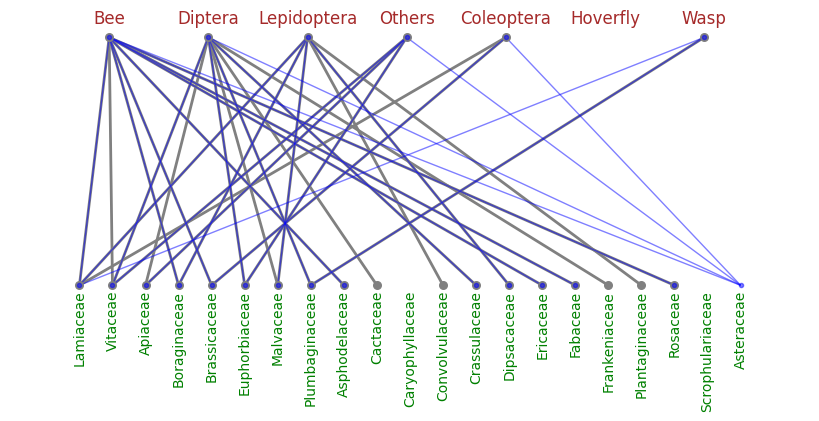

In [29]:
# tamaño de la figura
plt.figure(figsize=(8,3))
# Improved layout aumentando el espacio vertical entre los nodos
# pos = nx.bipartite_layout(B_test_max, index_names_det, align='horizontal')

# Dibujar el grafo bipartito
nx.draw(B_test_max, pos, with_labels=False, node_size=30, edge_color='gray', node_color='gray', width=2)
nx.draw(B_det_max, pos, with_labels=False, node_size=9, edge_color='blue', node_color='blue', alpha=0.5)

# Align labels to the left and right
for node, (x, y) in pos.items():
    horizontal_alignment = 'center'
    vertical_alignment = 'top' if node in index_names_det else 'bottom'
    colores = 'green' if node in index_names_det else 'brown'
    tamano = 10 if node in index_names_test else 12
    y = y - 0.01 if node in index_names_det else y + 0.02
    x = x
    # rotación
    rotation = 90 if node in index_names_det else 0
    plt.text(x, y, node, size=tamano, horizontalalignment=horizontal_alignment, verticalalignment=vertical_alignment, color=colores, rotation=rotation)

# Show plot with improvements
plt.show()

Métricas de las redes.

In [30]:
# Cantidad de nodos de cada red
print('Cantidad de nodos de la red de testeo: ', B_test_max.number_of_nodes())
print('Cantidad de nodos de la red de detección: ', B_det_max.number_of_nodes())


Cantidad de nodos de la red de testeo:  24
Cantidad de nodos de la red de detección:  21


In [38]:
# Cantidad de nodos de cada red
print('Cantidad de aristas de la red de testeo: ', B_test_max.number_of_edges())
print('Cantidad de aristas de la red de detección: ', B_det_max.number_of_edges())

Cantidad de aristas de la red de testeo:  28
Cantidad de aristas de la red de detección:  25


In [39]:
# Densidad de la red
print('Densidad de la red de testeo: ', nx.density(B_test_max))
print('Densidad de la red de detección: ', nx.density(B_det_max))

Densidad de la red de testeo:  0.10144927536231885
Densidad de la red de detección:  0.11904761904761904


In [35]:
# grado medio
print('Grado medio de la red de testeo: ', np.mean([val for (node, val) in B_test_max.degree()]))
print('Grado medio de la red de detección: ', np.mean([val for (node, val) in B_det_max.degree()]))

Grado medio de la red de testeo:  2.3333333333333335
Grado medio de la red de detección:  2.380952380952381


Cálculo de distancia entre grafos.

In [50]:
def mean_displacement_error(row1, row2):
    return np.mean(np.abs(row1 - row2))

def cosine_similarity(row1, row2):
    return 1 - cosine(row1, row2) 

# Matriz edge_prob_test_binary a numpy matrix
adj_test = np.array(edge_prob_test_binary)
adj_det = np.array(edge_prob_det_binary)

# Calculando las medias
mde_values = []
cosine_values = []
for row1, row2 in zip(adj_test, adj_det):
    mde_values.append(mean_displacement_error(row1, row2))
    cosine_values.append(cosine_similarity(row1, row2))

mean_mde = np.mean(mde_values)
mean_cosine_similarity = np.mean(cosine_values)

print("Media de Mean Displacement Error:", mean_mde)
print("Media de Cosine Similarity:", mean_cosine_similarity)

Media de Mean Displacement Error: 0.05357142857142856
Media de Cosine Similarity: 0.972434420249187


c:\Users\aemer\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\spatial\distance.py:622: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)
